#Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
file_path = r'D:\BANASHREE\KAGGLE DATASETS\diabetes_binary_health_indicators_BRFSS2015.csv'

df = pd.read_csv(file_path)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,roc_auc_score,recall_score
from sklearn.metrics import precision_score,recall_score
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from imblearn.over_sampling import SMOTE,ADASYN

#Loading the dataset

#Exploratory Data Analysis

In [ ]:
df.shape

(253680, 22)

The dataset have 22 features and 253680 data points

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
##what are the columns?
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
#checking information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.describe().T #provides the minimum value,maximum value,mean,standard deviation etc for each features. This gives an statistical overview of the features

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [ ]:
#what values does each feature take?
unique_values={}
for col in df.columns:
      unique_values[col]=df[col].value_counts().shape[0]
unique_values

{'Diabetes_binary': 2,
 'HighBP': 2,
 'HighChol': 2,
 'CholCheck': 2,
 'BMI': 84,
 'Smoker': 2,
 'Stroke': 2,
 'HeartDiseaseorAttack': 2,
 'PhysActivity': 2,
 'Fruits': 2,
 'Veggies': 2,
 'HvyAlcoholConsump': 2,
 'AnyHealthcare': 2,
 'NoDocbcCost': 2,
 'GenHlth': 5,
 'MentHlth': 31,
 'PhysHlth': 31,
 'DiffWalk': 2,
 'Sex': 2,
 'Age': 13,
 'Education': 6,
 'Income': 8}

In [ ]:
## Is there any Null values?
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Thus, this data set has no null values

In [ ]:
##There might be duplicate rows, duplicated rows means the data points which are redundant. thus checking if there are any duplicate rows
duplicate_rows=df.duplicated()
duplicate_rows.sum()  #number of duplicate rows


24206

In [ ]:
df.drop_duplicates(inplace=True)  #remove the duplicate rows

In [ ]:
df.shape  #sahpe of the dataset after removal of the duplicate rows

(229474, 22)

#univariate data analysis


<Axes: xlabel='Diabetes_binary'>

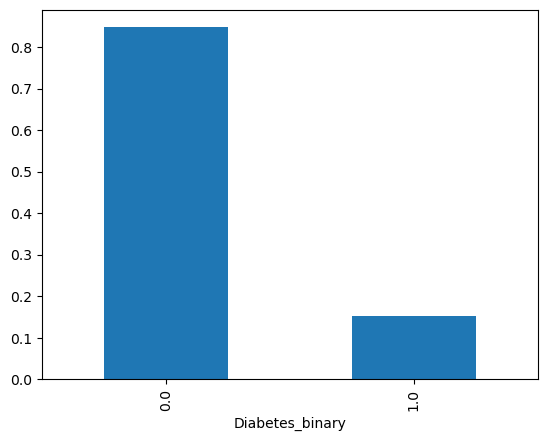

In [ ]:
df['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar')


Less than 20% patients are diabetic,imbalanced dataset

<Axes: xlabel='HighBP'>

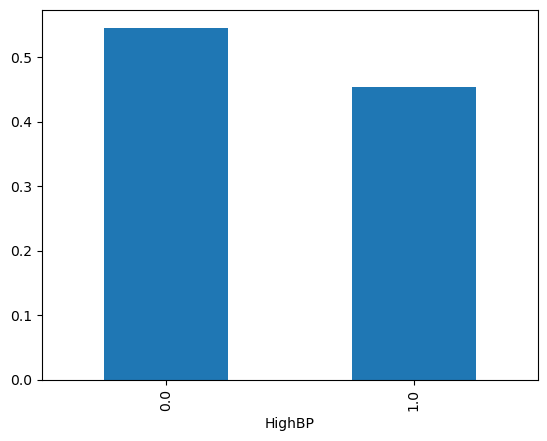

In [ ]:
df['HighBP'].value_counts(normalize=True).plot(kind='bar')

almost 45% of the data people have high BP

(array([3.21010e+04, 1.56217e+05, 3.55180e+04, 4.28100e+03, 7.07000e+02,
        2.47000e+02, 3.19000e+02, 8.40000e+01]),
 array([12.  , 22.75, 33.5 , 44.25, 55.  , 65.75, 76.5 , 87.25, 98.  ]),
 <BarContainer object of 8 artists>)

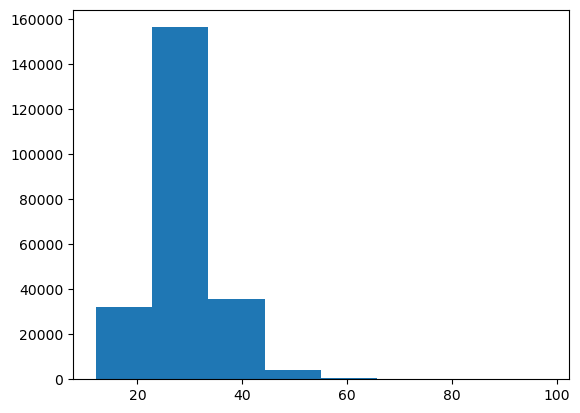

In [ ]:
plt.hist(df['BMI'], bins=8)

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

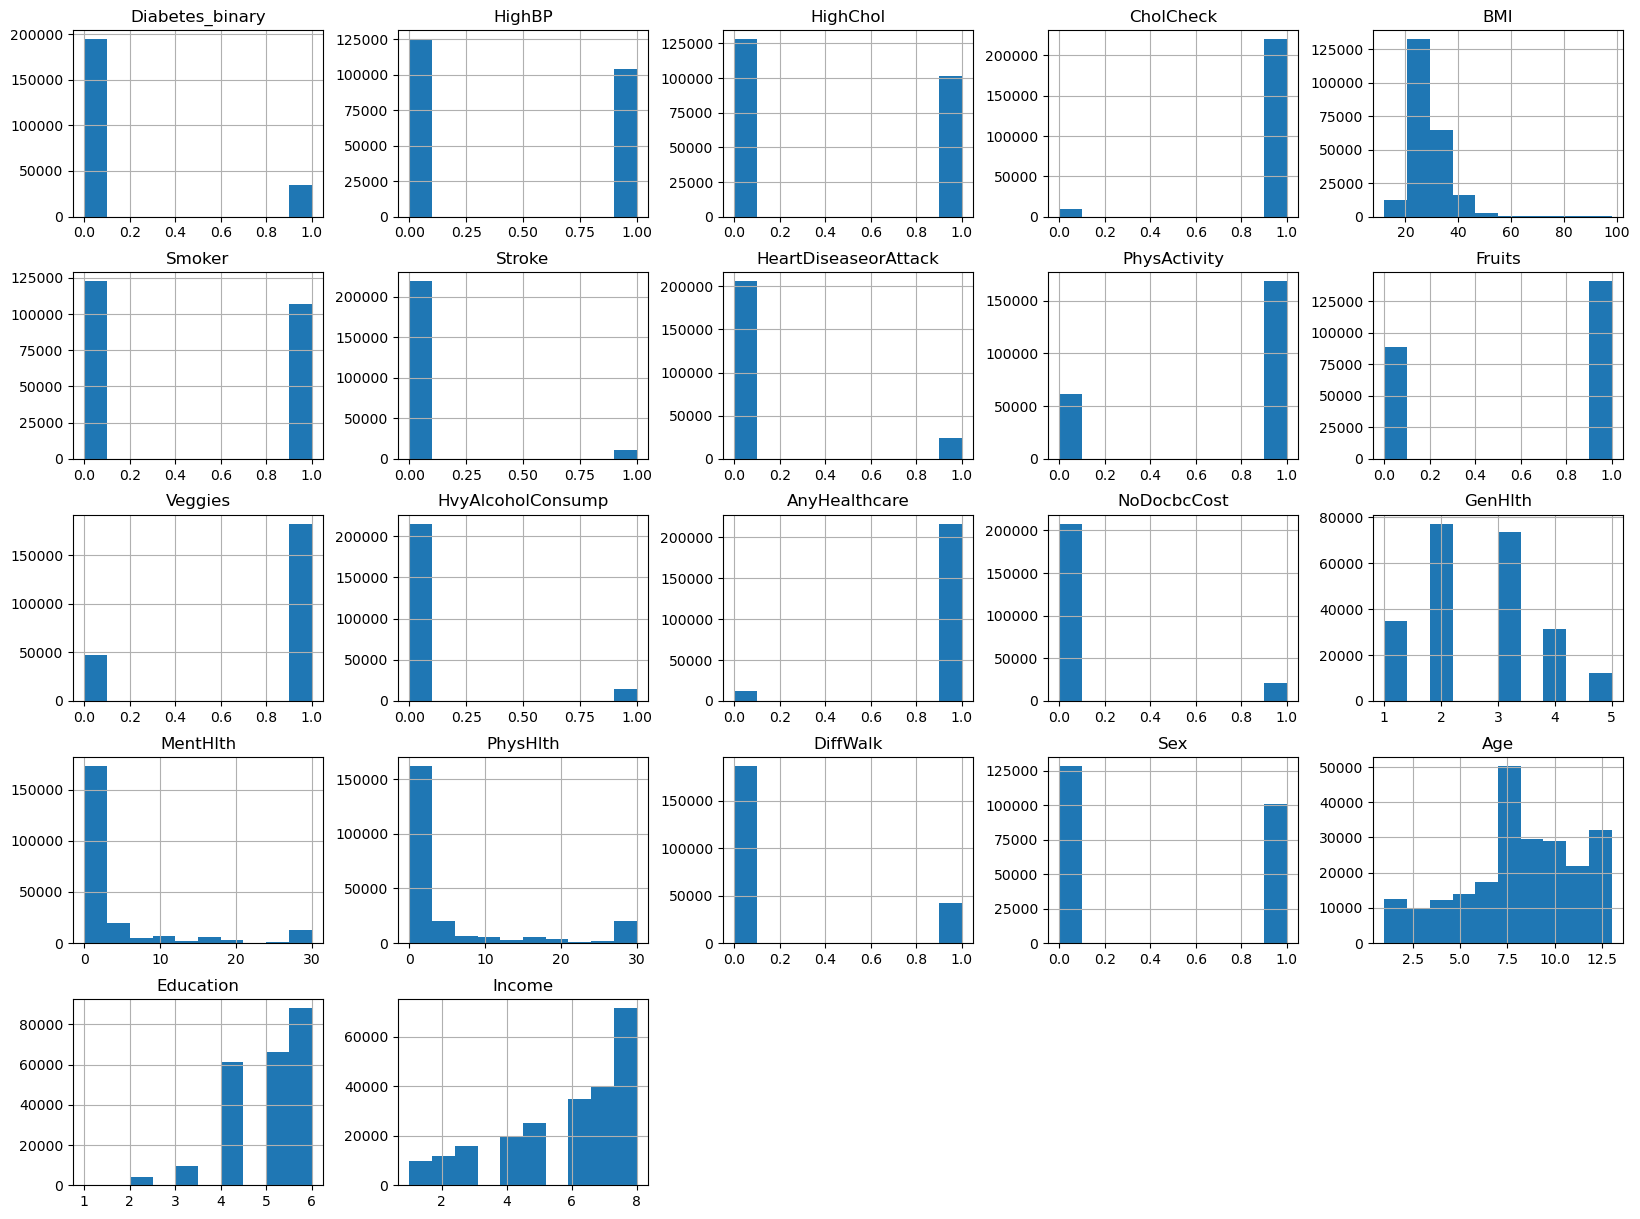

In [ ]:
df.hist(figsize=(20,15))  ##plot histogram of all the features

#Bivariate analysis

In [ ]:
cat_features=[col for col in df.columns if df[col].nunique() == 2 and col != 'Diabetes_binary'] #binary features

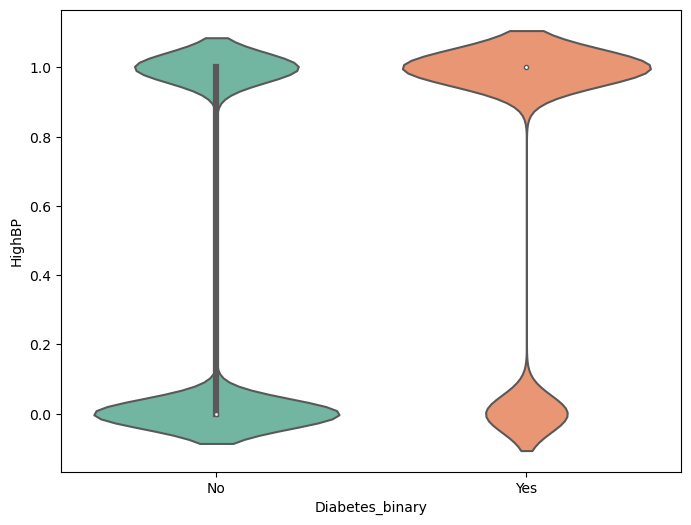

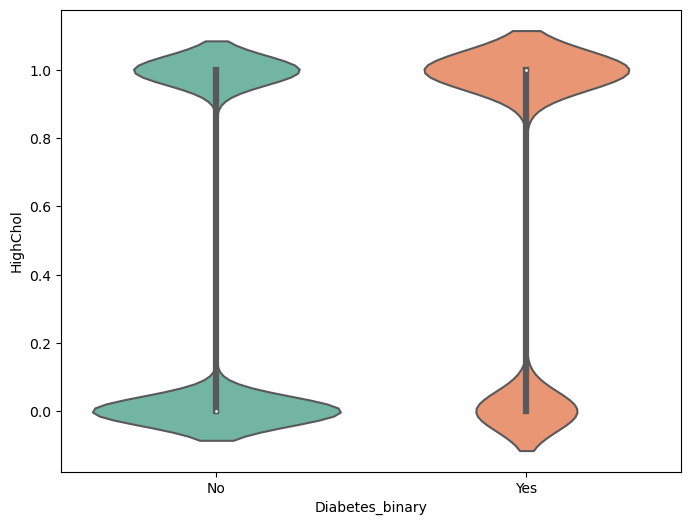

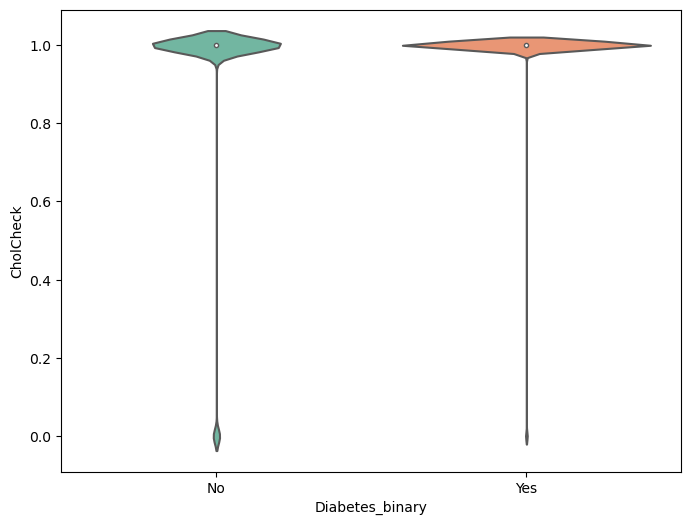

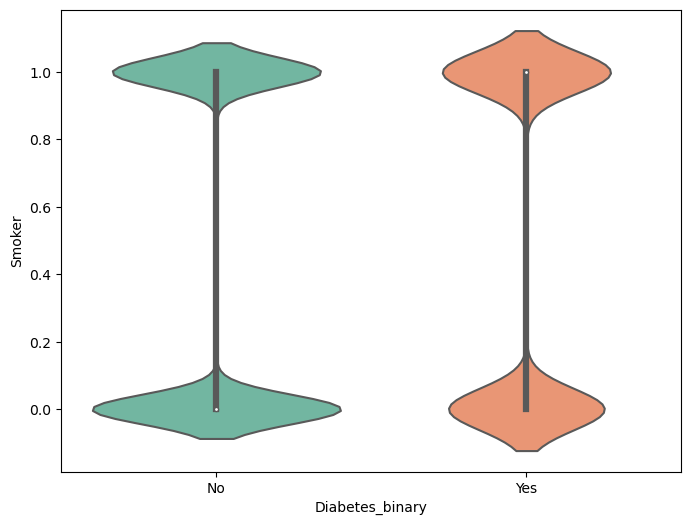

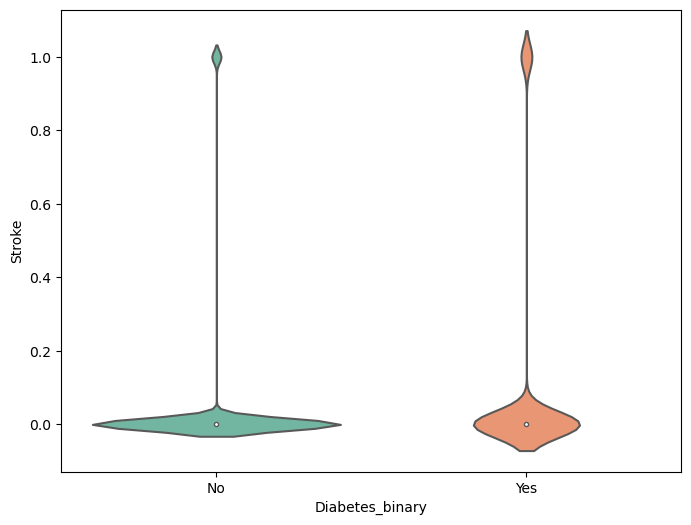

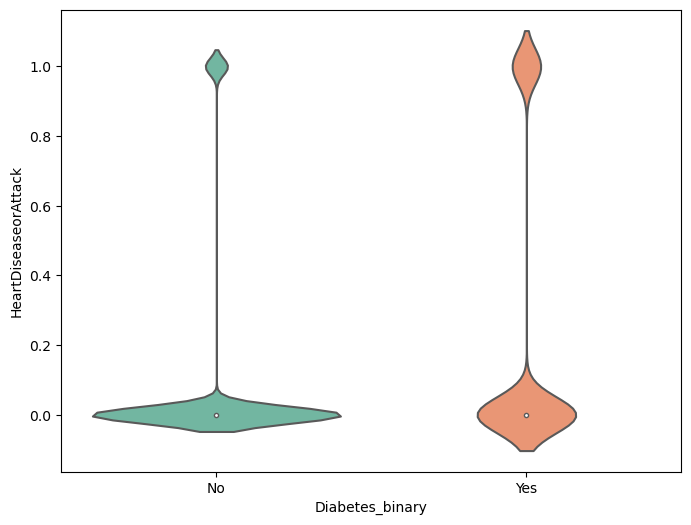

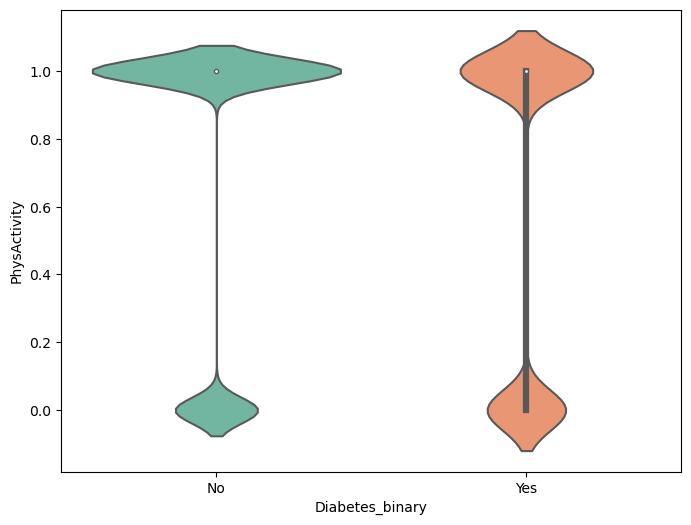

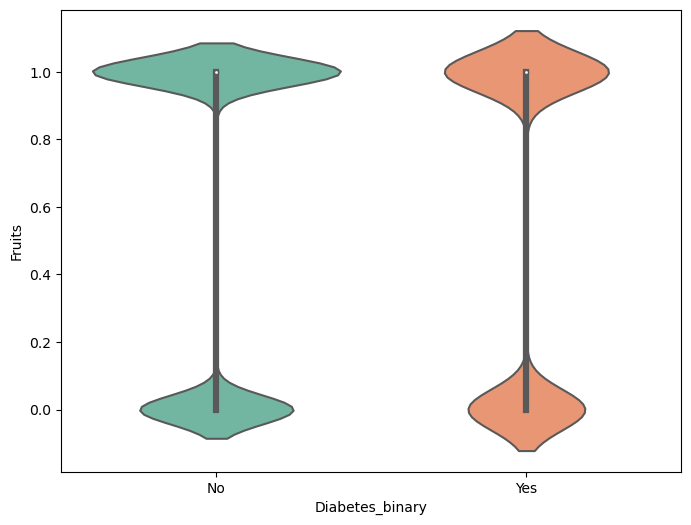

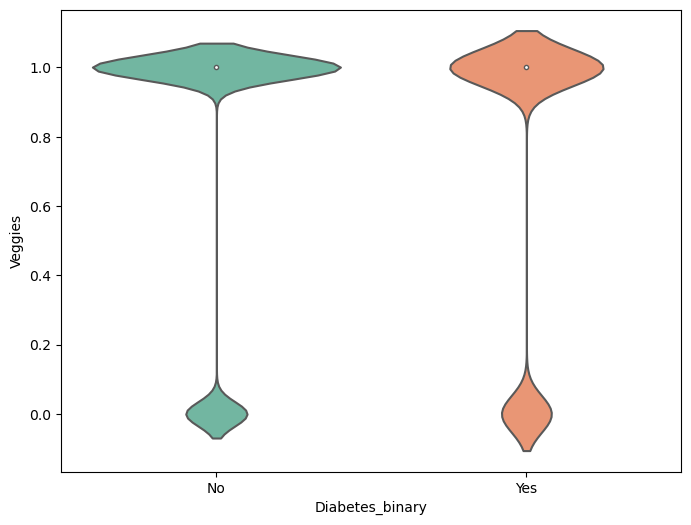

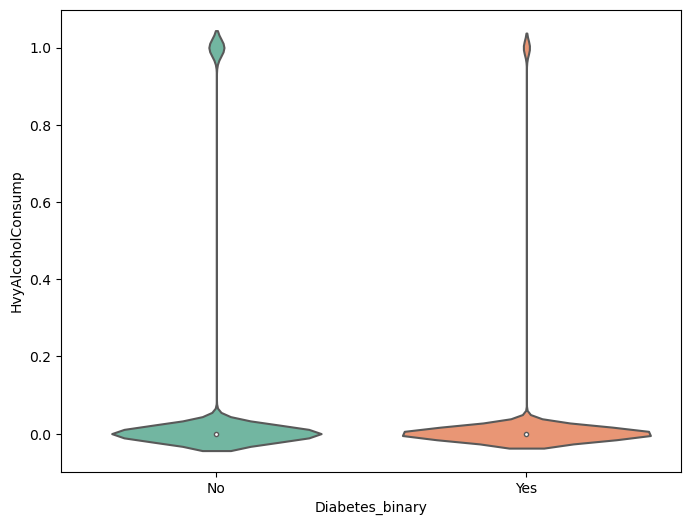

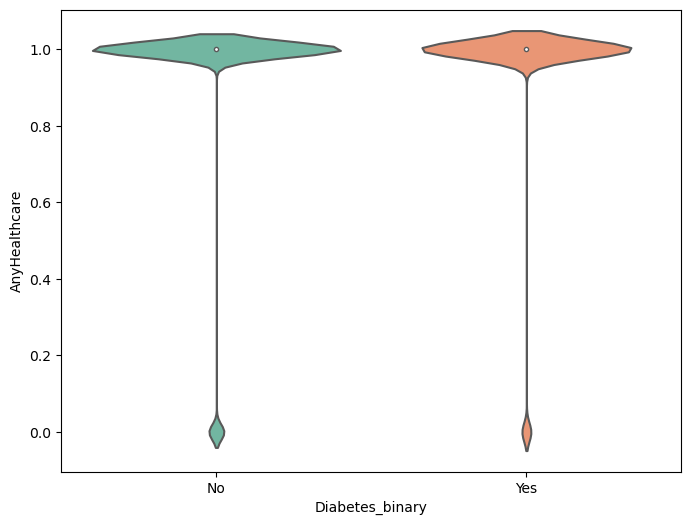

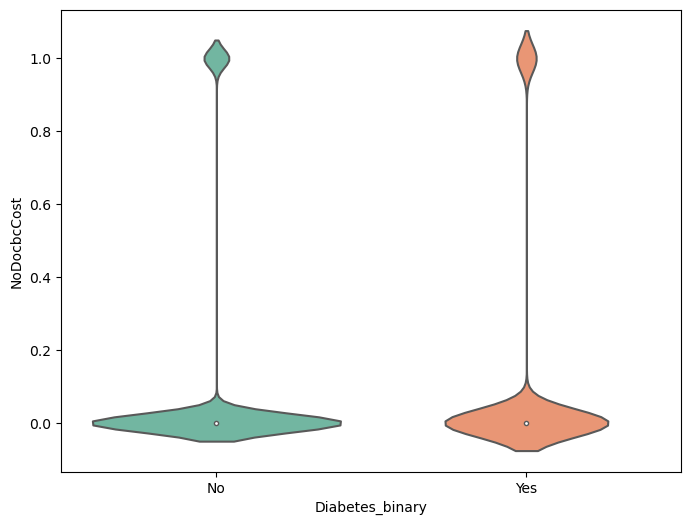

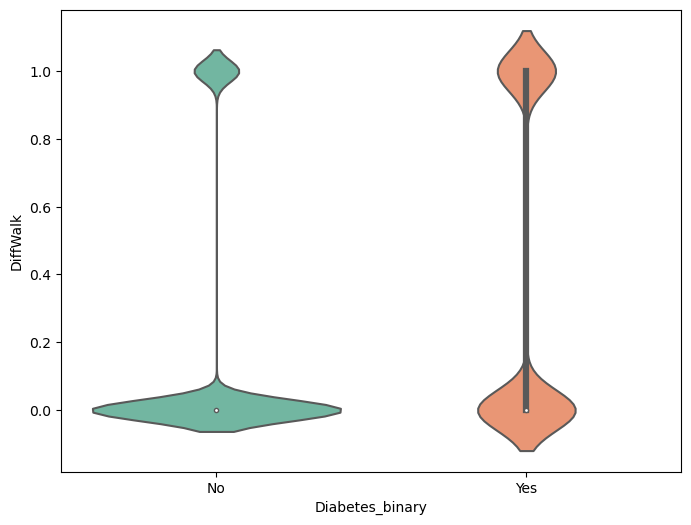

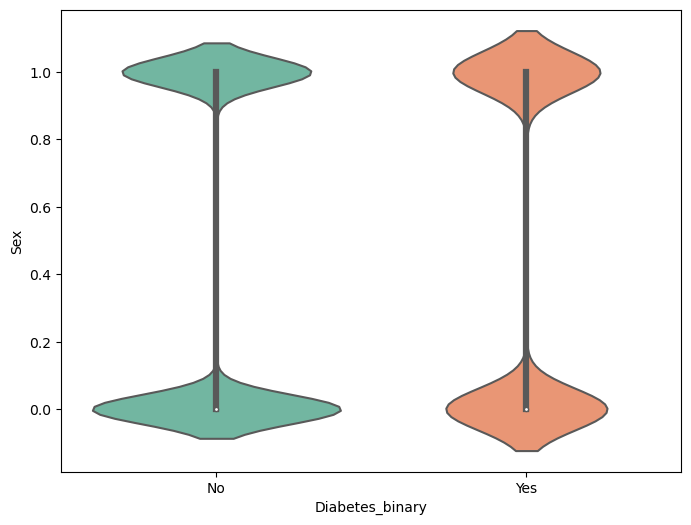

In [ ]:
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='Diabetes_binary', y=feature, palette='Set2')

    # Customize the plot
    plt.xlabel('Diabetes_binary')
    plt.ylabel(feature)
    # plt.title(f'Distribution of  by {feature} Status')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

    plt.show()


In [ ]:
# plt.figure(figsize=(8, 6))
# sns.violinplot(data=df, x='Diabetes_binary', y='HighBP', palette='Set2')

# # Customize the plot
# plt.xlabel('Diabetes Status')
# plt.ylabel('High Blood Pressure')
# plt.title('Distribution of High Blood Pressure by Diabetes Status')
# plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])

# plt.show()

CHECKING CORRELATION BETWEEN FEATURES

In [ ]:
df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,-0.008519,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907


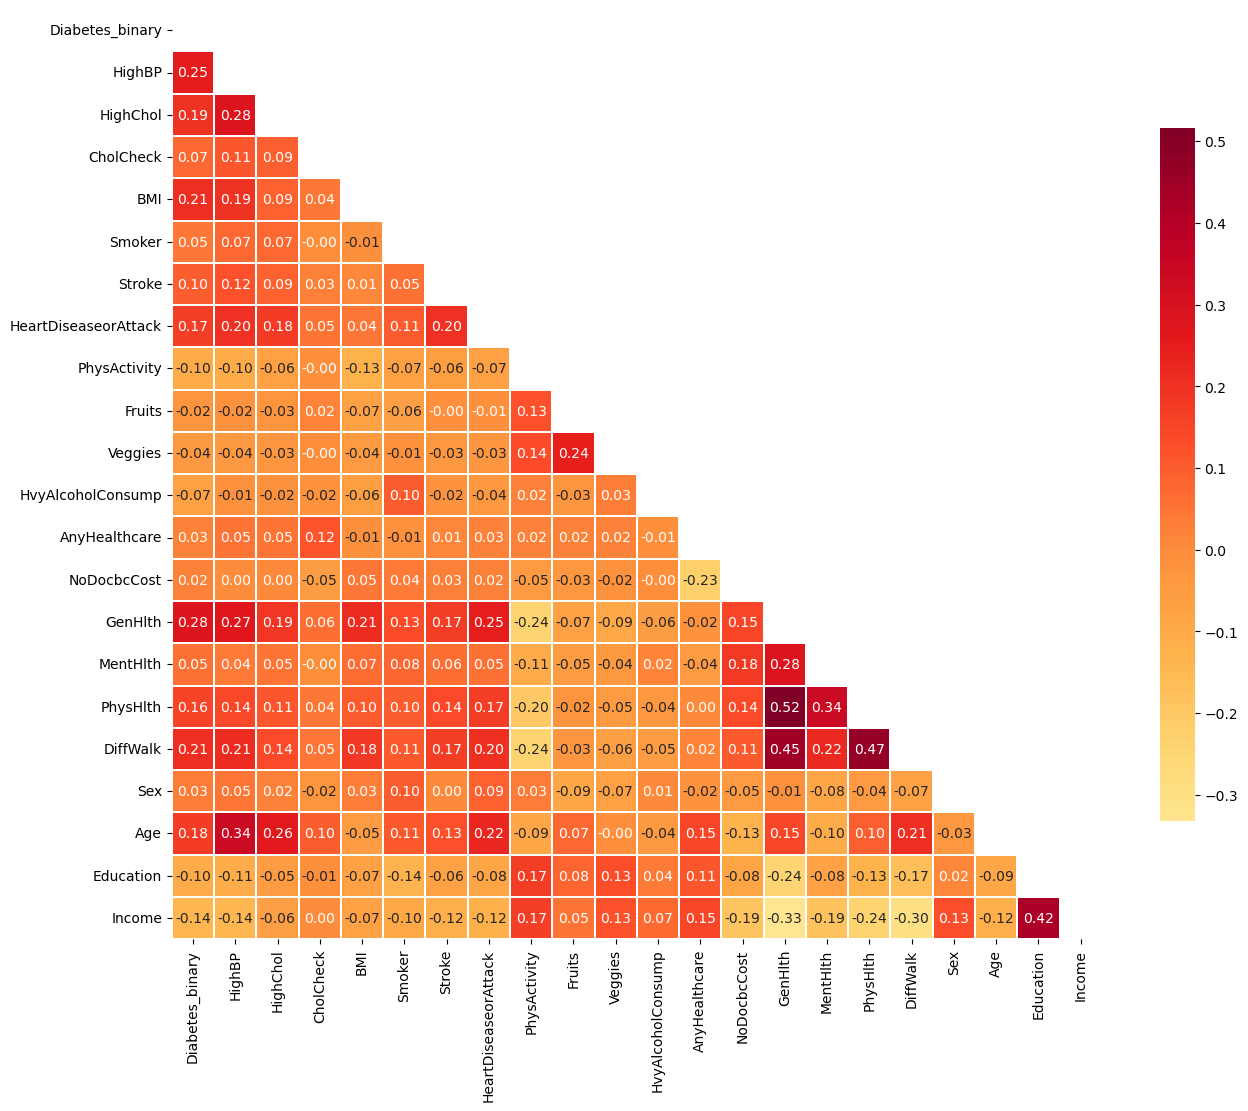

In [ ]:
##we can see the correlation better using heatmap
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),mask=mask,center=0,annot=True,fmt='.2f',cmap='YlOrRd',square=True, linewidths=.2,cbar_kws={"shrink": .6})
plt.show()

genhlth and phyhlth are highly positively correlated.

*   . Fruits , MentlHlth,AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.
*   HighBP.,Highchol,BMI etc have significanvt correleation with diabetes binary



Checking the relation of diabetes with factore's having significant correlation

In [ ]:
# pd.crosstab(df.HighBP,df.Diabetes_binary).plot(kind='bar')

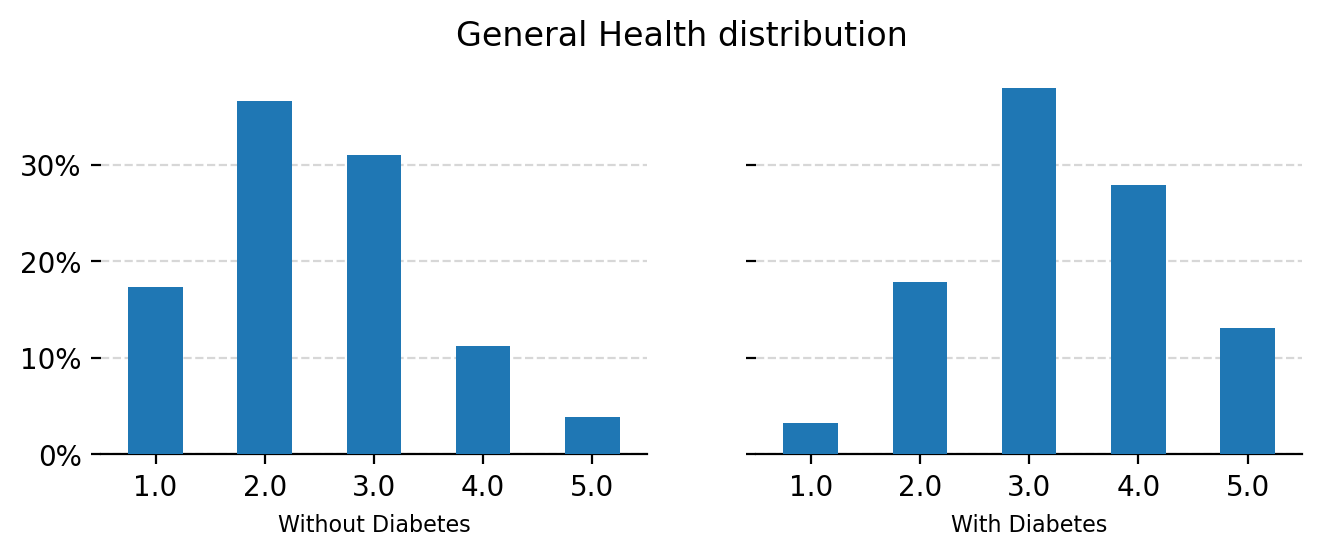

In [ ]:
ratio = 2.5
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.1,ratio), dpi=200, sharey=True)
fig.suptitle('General Health distribution')

(df[df['Diabetes_binary']==False]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df[df['Diabetes_binary']==True]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.violinplot(data=df, x='Diabetes_binary', y='HighBP', palette='Set2')

# # Customize the plot
# plt.xlabel('Diabetes Status')
# plt.ylabel('High Blood Pressure')
# plt.title('Distribution of High Blood Pressure by Diabetes Status')
# plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])

# plt.show()




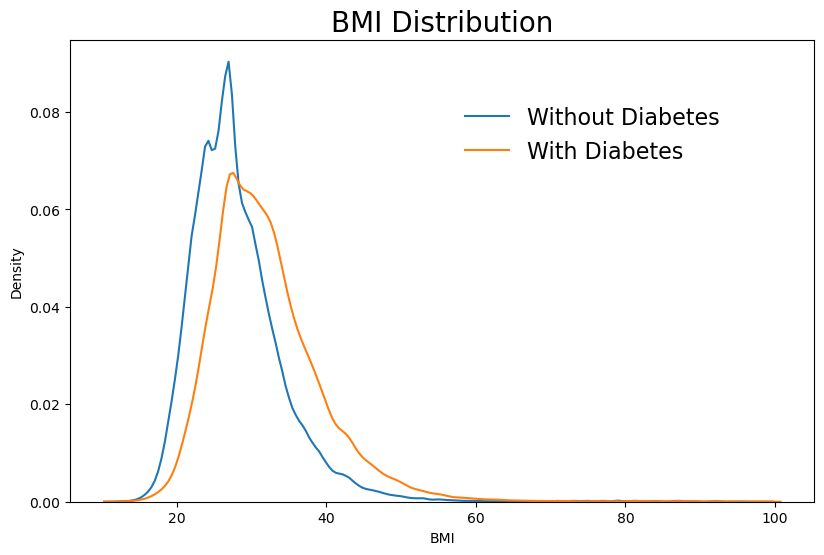

In [ ]:
ratio = 6
plt.figure(figsize=(ratio * 1.6, ratio))

# Create violin plots for BMI distribution in each category of 'Diabetes_binary'
sns.kdeplot(data=df[df['Diabetes_binary'] == False], x='BMI', label="Without Diabetes")

# Create KDE plots for BMI distribution in the 'Diabetes_binary' == True group
sns.kdeplot(data=df[df['Diabetes_binary'] == True], x='BMI', label="With Diabetes")

# Set plot title and legend
plt.title("BMI Distribution", size=20)
plt.legend(bbox_to_anchor=(.9, .9, 0, 0), shadow=False, frameon=False, prop={'size': 16})

# Show the plot
plt.show()

In [ ]:
#checking Diabetic patient with BMI less than 20

df[(df["BMI"]<=20)]["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    11650
1.0      545
Name: count, dtype: int64

In [ ]:
df[(df["BMI"]>20)  & (df["BMI"]<=50)]["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    181255
1.0     33849
Name: count, dtype: int64

In [ ]:
df[df["BMI"]>50]["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    1472
1.0     703
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

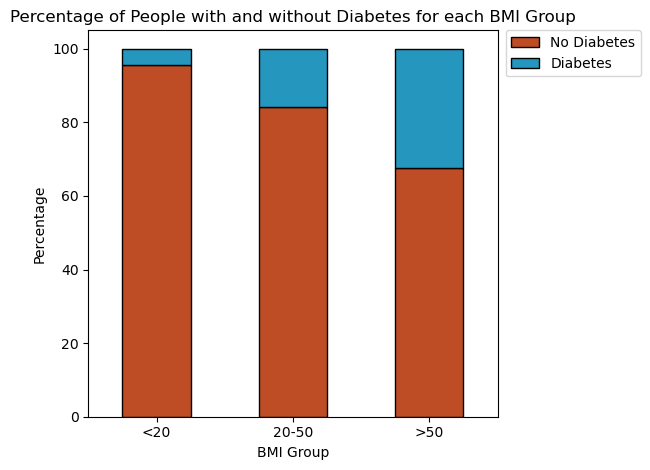

In [ ]:


# Categorize BMI into three groups: BMI<20, 20<=BMI<50, BMI>=50
df['BMI_Group'] = pd.cut(df['BMI'], bins=[0, 20, 50, float('inf')], labels=['<20', '20-50', '>50'])

# Create a new DataFrame with the counts of diabetes status for each BMI group
df_bmi_counts = df.groupby(['BMI_Group', 'Diabetes_binary']).size().unstack(fill_value=0)

# Calculate the percentage of diabetic and non-diabetic patients within each BMI group
df_bmi_percentages = df_bmi_counts.div(df_bmi_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
colors = ['#be4d25', '#2596be']
df_bmi_percentages.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

# Set plot title and labels
plt.title("Percentage of People with and without Diabetes for each BMI Group")
plt.xlabel("BMI Group")
plt.ylabel("Percentage")
plt.xticks(rotation=0)

# Show the plot
plt.legend(['No Diabetes', 'Diabetes'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


As BMI increases, the chances of being diabetic increase

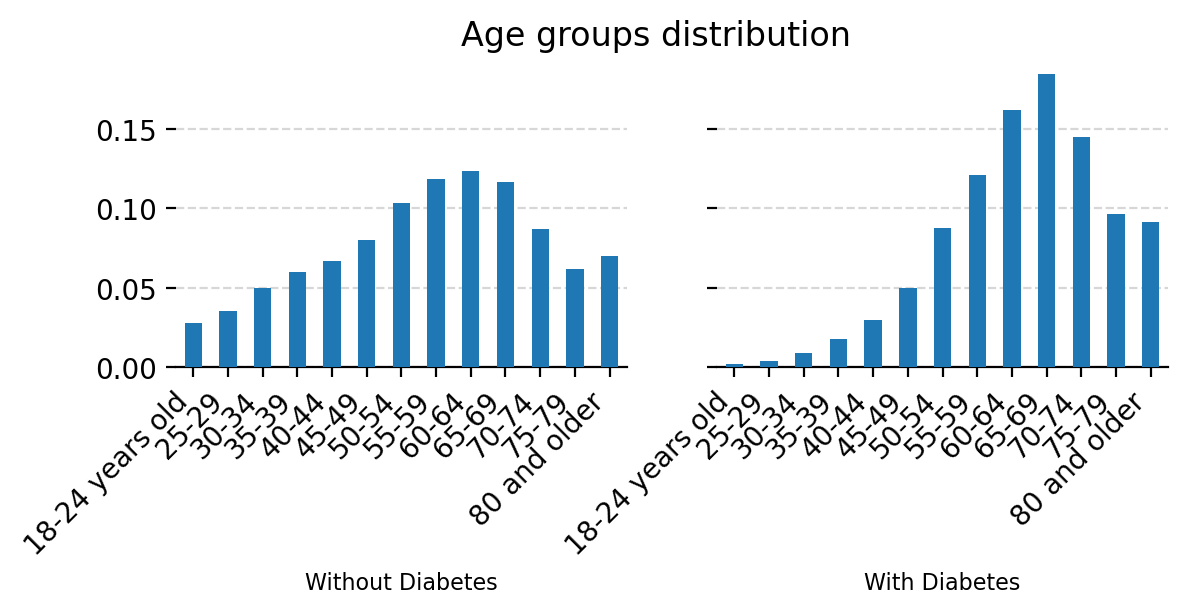

In [ ]:
ratio = 2
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Age groups distribution')
age_groups = ['18-24 years old', '25-29', '30-34',
              '35-39', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74',
              '75-79', '80 and older']


(df[df['Diabetes_binary']==False]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(age_groups)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

(df[df['Diabetes_binary']==True]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(age_groups)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');

##Feature Selection

feature selection with correlation

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Group'],
      dtype='object')

In [ ]:
df.drop('BMI_Group',axis=1,inplace=True)

In [ ]:
df= df.astype('int64')

In [ ]:
corr1=df.drop('Diabetes_binary',axis=1).corrwith(df['Diabetes_binary']).abs().sort_values(ascending=False)

In [ ]:
corr1

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
dtype: float64

In [ ]:
corr1[corr1>0.05]

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
dtype: float64

absolute values of correlation coefficients are sorted in decreasing order.

If we set a threshold of 0.05, Smoker and below features are out.

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
col_list=['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
       'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk','Age', 'Education',
       'Income']


In [ ]:
x=df[col_list]

In [ ]:
x.shape


(229474, 15)

In [ ]:
y=df['Diabetes_binary']

In [ ]:
y.shape

(229474,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0) #80% for training and 20% for testing

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [ ]:
x_train.shape

(183579, 15)

In [ ]:
x_test.shape

(45895, 15)

#CLASSIFIERS

In [ ]:
names = ['Logistic_Regression','KNN','Gaussian','Decision_Tree','RandomForest','Gradientboost','Xgboost']
colors = ['orange', 'blue', 'green', 'red','yellow', 'purple', 'brown']

In [ ]:
model_params= {
    'LogisticRegression':[LogisticRegression(), {}],
    'KNeighborsClassifier': [KNeighborsClassifier(),{'n_neighbors':list(range(1,21))}],
    'GaussianNB': [GaussianNB(),{}],
    'DecisionTreeClassifier':[DecisionTreeClassifier(),{'max_depth' : [10,20,30],'min_samples_split': [2, 3, 4],'criterion' :['gini', 'entropy']}],
    'RandomForestClassifier':[RandomForestClassifier(),{'n_estimators': [100,200,300],'max_depth' : [10,20,30],'criterion' :['gini', 'entropy']}],
    'GradientBoostingClassifier': [GradientBoostingClassifier(),{'n_estimators': [50, 100],'learning_rate': [0.01, 0.05]}],
    'XGBClassifier': [XGBClassifier(),{'learning_rate': [0.01, 0.05],'max_depth': [3]}]
}

In [ ]:
result={}

for key, value in model_params.items():
    result_list=[]
    classifier = GridSearchCV(value[0],value[1],cv=10, scoring="accuracy", n_jobs=-1).fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_prob=classifier.predict_proba(x_test)[:,1]
    score= accuracy_score(y_test,y_pred)
    score1 = f1_score(y_test, y_pred)
    score2 = roc_auc_score(y_test, y_pred_prob)
    score3 = precision_score(y_test, y_pred)
    score4 = recall_score(y_test, y_pred)
    best_params = classifier.best_params_

    result_list.append(score)
    result_list.append(score1)
    result_list.append(score2)
    result_list.append(score3)
    result_list.append(score4)
    result_list.append(best_params)
    result[key]=result_list

In [ ]:
final_results= pd.DataFrame(result)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="Accuracy"
columns[1]="F1 score"
columns[2]="roc auc score"
columns[3]="Presicion"
columns[4]="recall"
columns[5]="best parameters"
final_results.columns=columns
final_results

,Accuracy,F1 score,roc auc score,Presicion,recall,best parameters
LogisticRegression,0.850441,0.22963,0.808124,0.541556,0.145706,{}
KNeighborsClassifier,0.850986,0.222222,0.783333,0.551354,0.139154,{'n_neighbors': 20}
GaussianNB,0.756313,0.418892,0.770599,0.329734,0.574135,{}
DecisionTreeClassifier,0.850616,0.224785,0.801336,0.545255,0.141575,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
RandomForestClassifier,0.852794,0.169821,0.81418,0.618621,0.098419,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
GradientBoostingClassifier,0.853906,0.213859,0.816039,0.604775,0.129896,"{'learning_rate': 0.05, 'n_estimators': 100}"
XGBClassifier,0.853426,0.192146,0.814604,0.612557,0.113944,"{'learning_rate': 0.05, 'max_depth': 3}"


In [ ]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

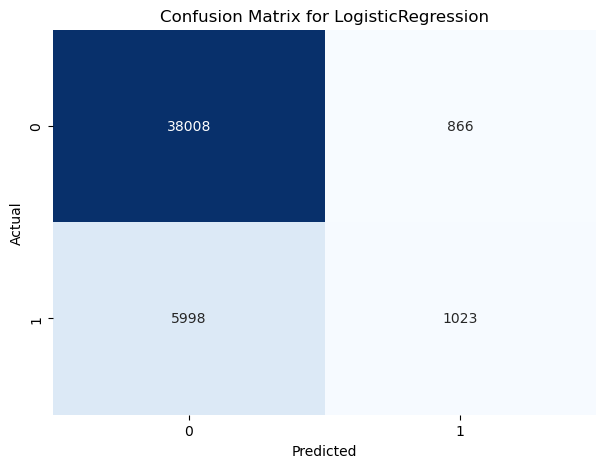

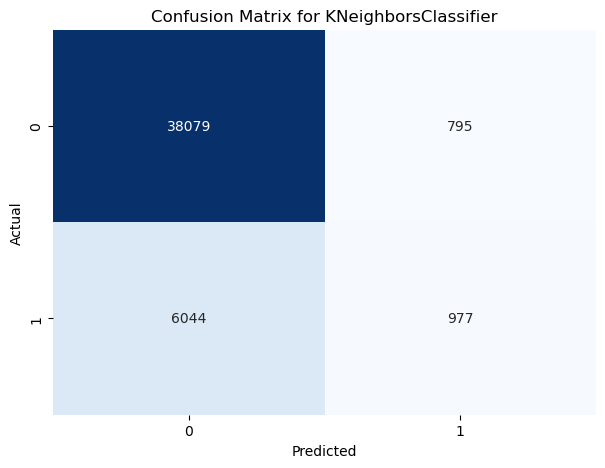

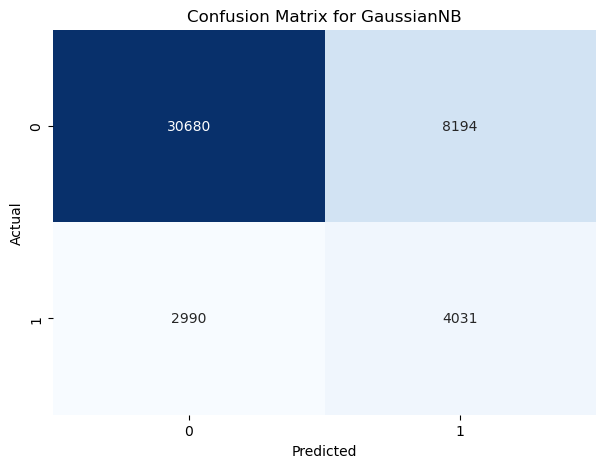

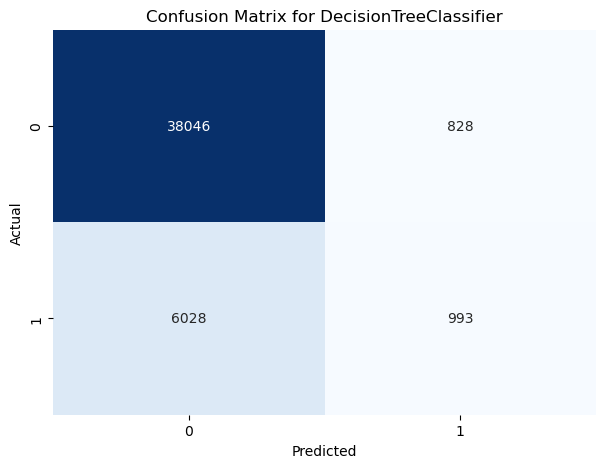

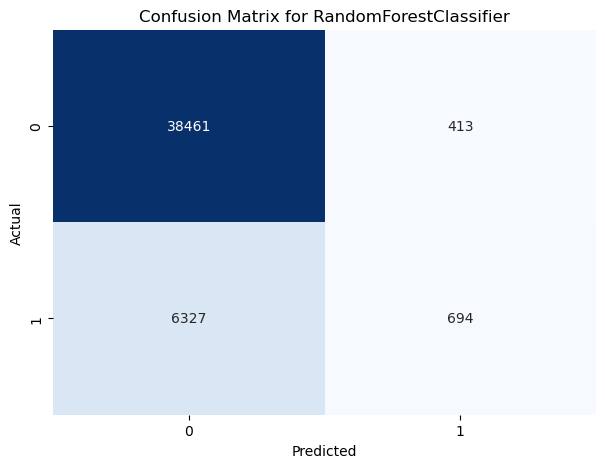

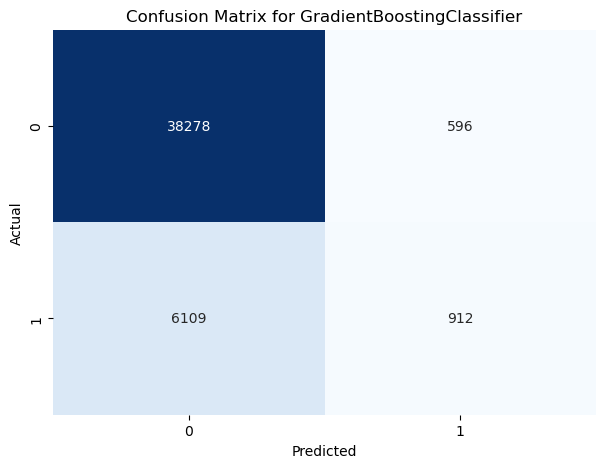

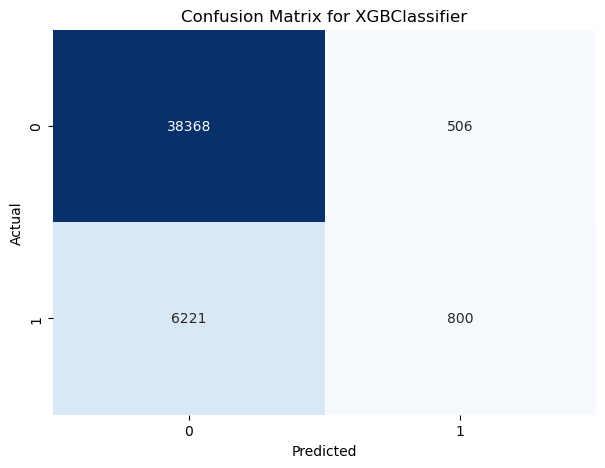

In [ ]:
for key in result:
    best_params = result[key][-1]  # Retrieve best parameters
    classifier = model_params[key][0].set_params(**best_params)  # Set best parameters
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {key}')

LOGISTIC REGRESSION DOESNOT CONVERGE IF THE FEATURES ARE NOT SCALED

Recall is very important in medical domains (e.g., identifying cancer), where you really want to minimize the chance of missing positive cases (predicting false negatives). These are typically cases where missing a positive case has a much bigger cost than wrongly classifying something as positive.


#TAKING CARE OF THE IMBALANCED DATASET

UNDERSAMPLING


In [ ]:
nm=NearMiss()  #no improvement using near miss

In [ ]:
X_rus,Y_rus=nm.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_rus,Y_rus,test_size=0.20,random_state=0) #80% for training and 20% for testing

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
result_under={}

for key, value in model_params.items():
    result_list=[]
    classifier = GridSearchCV(value[0],value[1],cv=10, scoring="accuracy", n_jobs=-1).fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_prob=classifier.predict_proba(x_test)[:,1]
    score= accuracy_score(y_test,y_pred)
    score1 = f1_score(y_test, y_pred)
    score2 = roc_auc_score(y_test, y_pred_prob)
    score3 = precision_score(y_test, y_pred)
    score4 = recall_score(y_test, y_pred)
    best_params = classifier.best_params_

    result_list.append(score)
    result_list.append(score1)
    result_list.append(score2)
    result_list.append(score3)
    result_list.append(score4)
    result_list.append(best_params)
    result_under[key]=result_list

In [ ]:
final_results= pd.DataFrame(result_under)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="Accuracy"
columns[1]="F1 score"
columns[2]="roc auc score"
columns[3]="Presicion"
columns[4]="recall"
columns[5]="best parameters"
final_results.columns=columns
final_results

,Accuracy,F1 score,roc auc score,Presicion,recall,best parameters
LogisticRegression,0.824204,0.813511,0.897936,0.885653,0.752236,{}
KNeighborsClassifier,0.808248,0.786112,0.878938,0.91105,0.691308,{'n_neighbors': 17}
GaussianNB,0.789016,0.75472,0.886633,0.92622,0.636808,{}
DecisionTreeClassifier,0.835458,0.822826,0.895553,0.911935,0.749581,"{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
RandomForestClassifier,0.844077,0.832453,0.913583,0.920291,0.759922,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."
GradientBoostingClassifier,0.843579,0.833535,0.911637,0.910868,0.768306,"{'learning_rate': 0.05, 'n_estimators': 100}"
XGBClassifier,0.84479,0.833601,0.911726,0.91901,0.762717,"{'learning_rate': 0.05, 'max_depth': 3}"


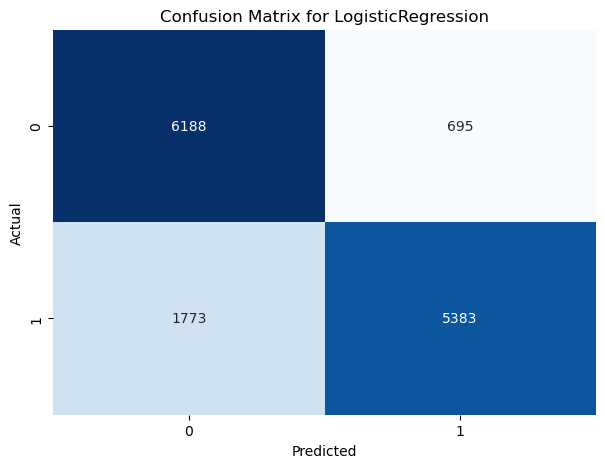

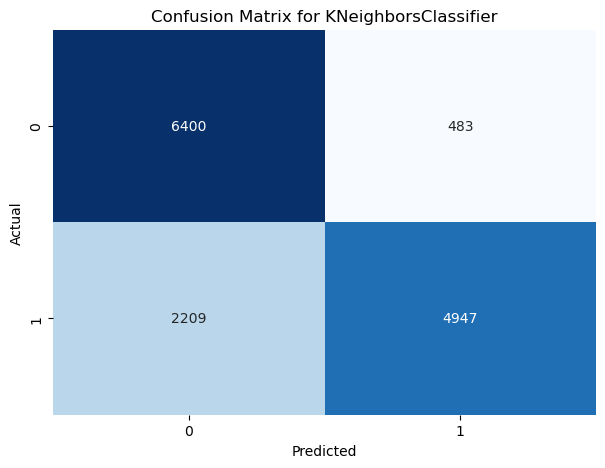

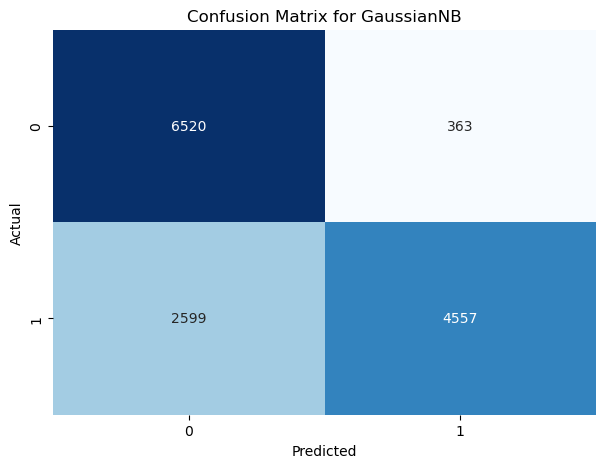

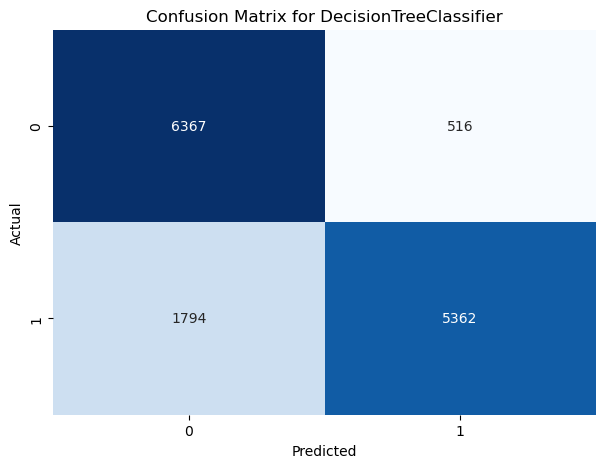

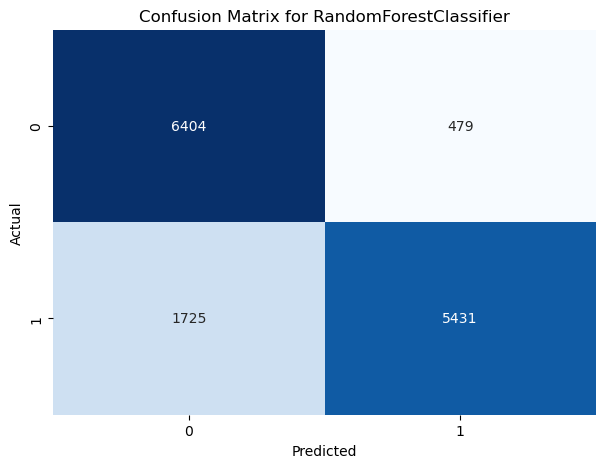

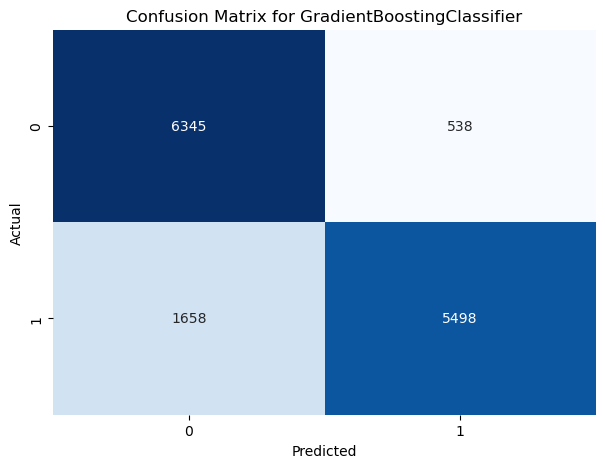

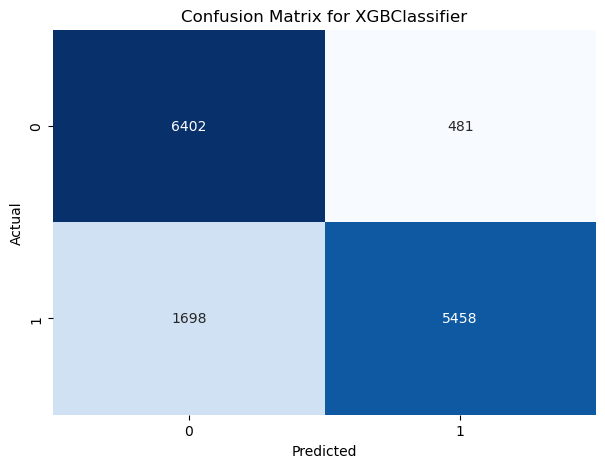

In [ ]:
for key in result_under:
    best_params = result_under[key][-1]  # Retrieve best parameters
    classifier = model_params[key][0].set_params(**best_params)  # Set best parameters
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {key}')


upsampling with SMOTE

For every observation in the minority class, SMOTE selects
k nearest neighbors, takes the difference between the feature vector of the observation under consideration and its nearest neighbor, multiplies this difference by a random number between 0 and 1, and adds it to the feature vector of the observation.

In [ ]:
oversample = SMOTE(random_state=508312)

In [ ]:
X_o,Y_o=oversample.fit_resample(x,y)

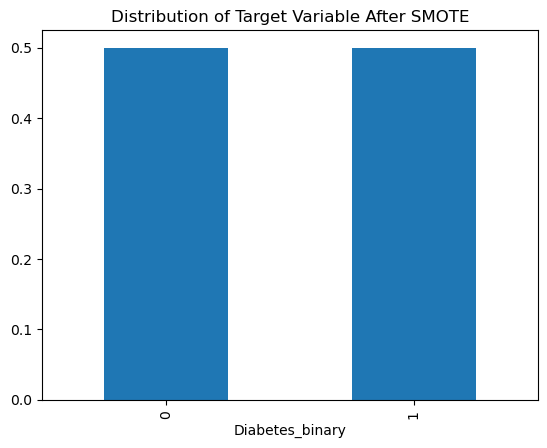

In [ ]:
Y_over=pd.Series(Y_o)
Y_over.value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Target Variable After SMOTE')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_o,Y_o,test_size=0.20,random_state=0) #80% for training and 20% for testing

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
result_smote={}

for key, value in model_params.items():
    result_list=[]
    classifier = GridSearchCV(value[0],value[1],cv=10, scoring="accuracy", n_jobs=-1).fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_prob=classifier.predict_proba(x_test)[:,1]
    score= accuracy_score(y_test,y_pred)
    score1 = f1_score(y_test, y_pred)
    score2 = roc_auc_score(y_test, y_pred_prob)
    score3 = precision_score(y_test, y_pred)
    score4 = recall_score(y_test, y_pred)
    best_params = classifier.best_params_

    result_list.append(score)
    result_list.append(score1)
    result_list.append(score2)
    result_list.append(score3)
    result_list.append(score4)
    result_list.append(best_params)
    result_smote[key]=result_list

In [ ]:
final_results= pd.DataFrame(result_smote)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="Accuracy"
columns[1]="F1 score"
columns[2]="roc auc score"
columns[3]="Presicion"
columns[4]="recall"
columns[5]="best parameters"
final_results.columns=columns
final_results

,Accuracy,F1 score,roc auc score,Presicion,recall,best parameters
LogisticRegression,0.717444,0.723427,0.791374,0.706484,0.741203,{}
KNeighborsClassifier,0.800221,0.809899,0.800374,0.770474,0.853575,{'n_neighbors': 1}
GaussianNB,0.695116,0.734156,0.760191,0.64938,0.844392,{}
DecisionTreeClassifier,0.806755,0.815479,0.824038,0.778215,0.856491,"{'criterion': 'entropy', 'max_depth': 30, 'min..."
RandomForestClassifier,0.8395,0.847271,0.923557,0.806045,0.892942,"{'criterion': 'gini', 'max_depth': 30, 'n_esti..."
GradientBoostingClassifier,0.730216,0.742866,0.805212,0.707745,0.781653,"{'learning_rate': 0.05, 'n_estimators': 100}"
XGBClassifier,0.72983,0.744079,0.804536,0.704982,0.787767,"{'learning_rate': 0.05, 'max_depth': 3}"


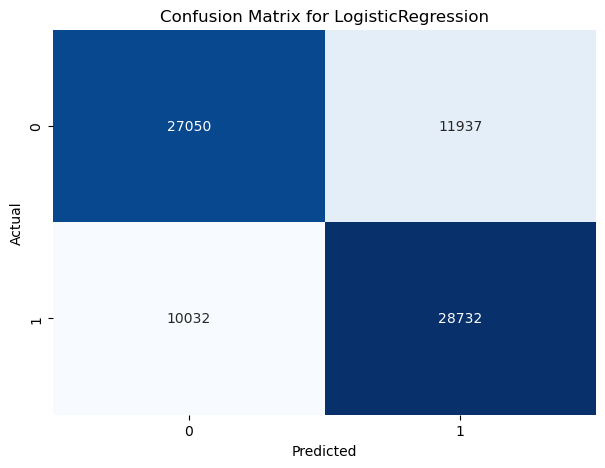

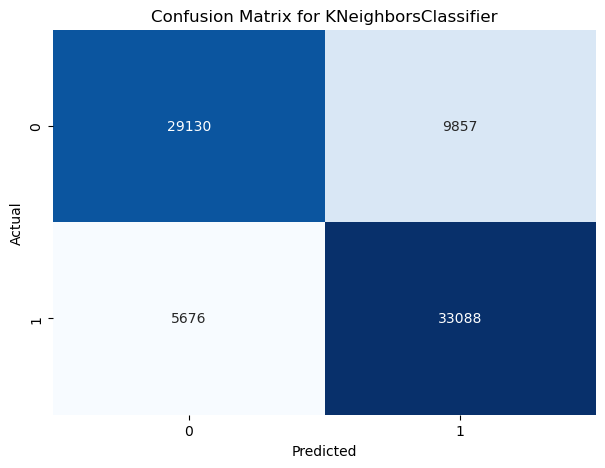

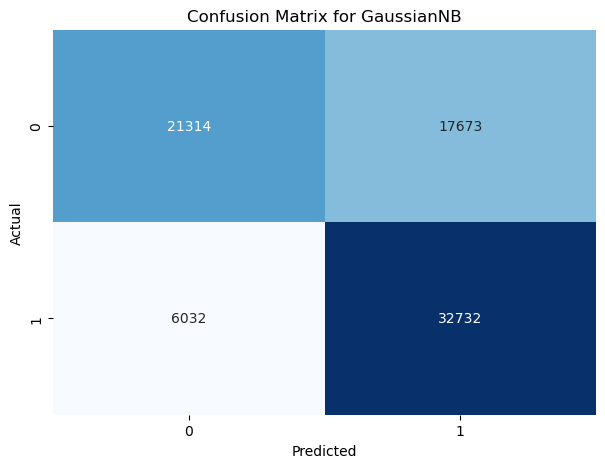

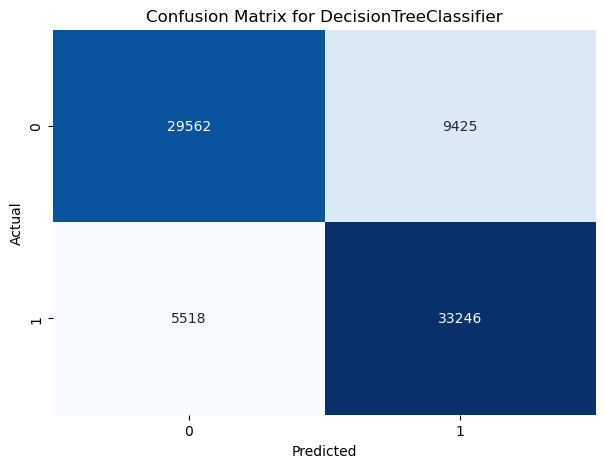

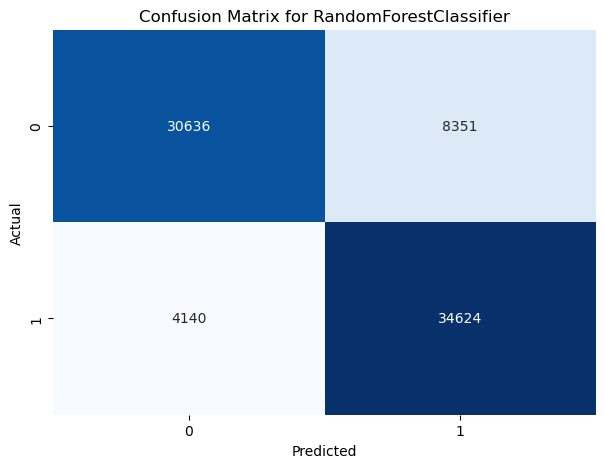

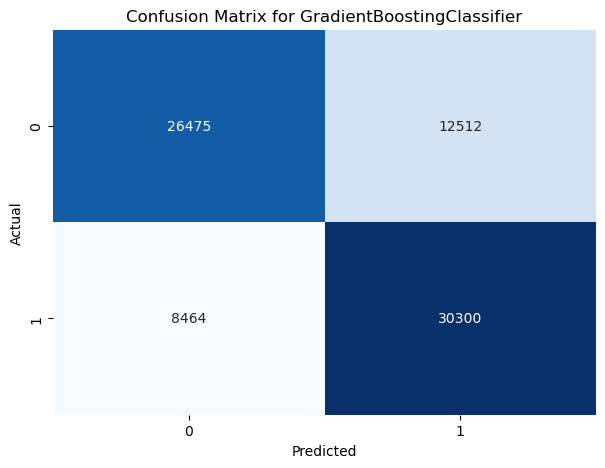

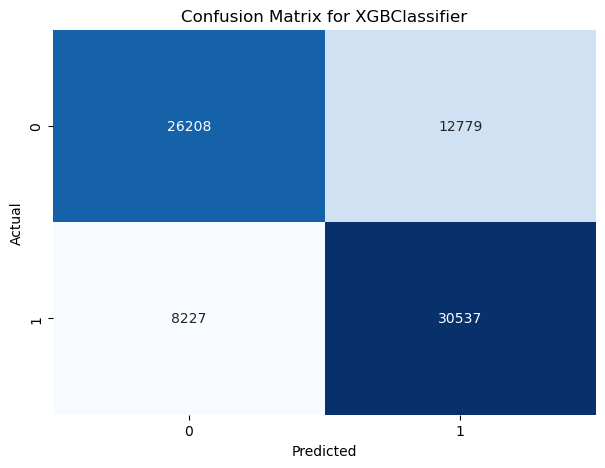

In [ ]:
for key in result_smote:
    best_params = result_smote[key][-1]  # Retrieve best parameters
    classifier = model_params[key][0].set_params(**best_params)  # Set best parameters
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {key}')
